# 인구 공공데이터로 우리 동네 인구구조 분석하기

https://jumin.mois.go.kr/
연령별 인구현황 -> 

행정구역(서울특별시), 조회기간(월간, 2022년 1월), 구분('계'), 연령구분단위(10세), 만연령구분( 0, 100이상 검색) -> 

전체읍면동현황 선택 -> csv파일 다운

In [1]:
# 구글 코랩과 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/인공지능A/age_2201.csv' #파일경로 저장

###1. 서대문구 천연동 인구분포 확인하기

In [3]:
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)

for row in data :
  if row[0] == "서울특별시 서대문구 천연동(1141052000)":  #'행정구역'열의 정확한 명칭--11141052000 이런 것까지 알아야 해서 불편함
    print(row)

['서울특별시 서대문구 천연동(1141052000)', '17,107', '17,107', '1,146', '1,377', '2,118', '2,305', '2,618', '3,028', '2,280', '1,338', '797', '95', '5']


In [4]:
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)

for row in data:
  if '천연동' in row[0]:   #엑셀 파일 안 열고 알아서 잘 찾기- '천연동' 이라는 단어가 들어가 있다면 뽑아오기
    print(row)

['서울특별시 서대문구 천연동(1141052000)', '17,107', '17,107', '1,146', '1,377', '2,118', '2,305', '2,618', '3,028', '2,280', '1,338', '797', '95', '5']


###2. 헤더 확인

In [6]:
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)
header=next(data)
print(header)

['행정구역', '2022년01월_계_총인구수', '2022년01월_계_연령구간인구수', '2022년01월_계_0~9세', '2022년01월_계_10~19세', '2022년01월_계_20~29세', '2022년01월_계_30~39세', '2022년01월_계_40~49세', '2022년01월_계_50~59세', '2022년01월_계_60~69세', '2022년01월_계_70~79세', '2022년01월_계_80~89세', '2022년01월_계_90~99세', '2022년01월_계_100세 이상']


###3. 0세~100세이상 데이터만 뽑아보기

In [7]:
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)

for row in data:
  if '천연동' in  row[0]: 
    for i in row[3:]: # 계_0세~100세이상
      print(i)
type(row[3])  #데이터 저장 형태 확인--문자열이네!

1,146
1,377
2,118
2,305
2,618
3,028
2,280
1,338
797
95
5


str

###4. 그래프 그리기
문자형 데이터를 정수형으로 변환, 그 전에 쉼표(,)기호 없애기!

[1146, 1377, 2118, 2305, 2618, 3028, 2280, 1338, 797, 95, 5]


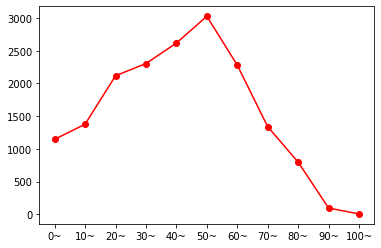

In [8]:
import matplotlib.pyplot as plt
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)
popu=[]    #인구수 저장 리스트

for row in data:
  if '천연동' in  row[0]:
    for i in row[3:]:
      popu.append(int(i.replace(',','')))  #정수형(int)로 변환, 쉼표를 빈칸''으로 변경
                  
print(popu)

plt.plot(popu, 'ro-')
plt.xticks(range(0,11),['0~','10~','20~','30~','40~','50~','60~','70~','80~','90~','100~']) #x축 라벨달기
plt.show()

###5. 알고 싶은 지역명을 대답으로 받아 보여주기


알고 싶은 지역의 이름(읍면동단위)를 입력해주세요:대치1동
[1709, 5334, 2365, 1389, 5597, 4019, 2049, 1131, 380, 73, 6]


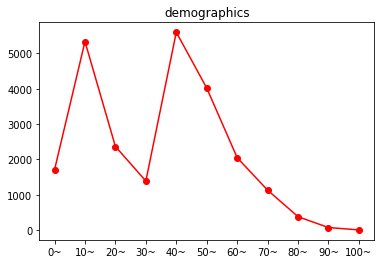

In [15]:
import matplotlib.pyplot as plt
import csv
f=open(path, encoding='cp949')
data=csv.reader(f)
popu2=[]  #새로운 지역명
name = input("알고 싶은 지역의 이름(읍면동단위)를 입력해주세요:")

for row in data:
  if name in  row[0]: 
    for i in row[3:]:
      popu2.append(int(i.replace(',','')))

print(popu2)
plt.title('demographics')
plt.plot(popu2, 'ro-')
plt.xticks(range(0,11),['0~','10~','20~','30~','40~','50~','60~','70~','80~','90~','100~'])
plt.show()

# 남녀 구분하여 항아리 그래프 그리기


https://jumin.mois.go.kr/
연령별 인구현황 -> 

행정구역(서울특별시), 조회기간(월간, 2022년 1월), 구분(남여구분), 연령구분단위(10세), 만연령구분(0, 100이상) -> 

전체읍면동현황 선택 -> csv파일 다운

In [17]:
path3='/content/drive/MyDrive/인공지능A/age_2201_mf.csv'

In [18]:
# 헤더 확인
import csv
f=open(path3, encoding='cp949')
data=csv.reader(f)
header=next(data)
print(header)

['행정구역', '2022년01월_남_총인구수', '2022년01월_남_연령구간인구수', '2022년01월_남_0~9세', '2022년01월_남_10~19세', '2022년01월_남_20~29세', '2022년01월_남_30~39세', '2022년01월_남_40~49세', '2022년01월_남_50~59세', '2022년01월_남_60~69세', '2022년01월_남_70~79세', '2022년01월_남_80~89세', '2022년01월_남_90~99세', '2022년01월_남_100세 이상', '2022년01월_여_총인구수', '2022년01월_여_연령구간인구수', '2022년01월_여_0~9세', '2022년01월_여_10~19세', '2022년01월_여_20~29세', '2022년01월_여_30~39세', '2022년01월_여_40~49세', '2022년01월_여_50~59세', '2022년01월_여_60~69세', '2022년01월_여_70~79세', '2022년01월_여_80~89세', '2022년01월_여_90~99세', '2022년01월_여_100세 이상']


In [19]:
#남, 여 각각 리스트에 저장
import csv
f=open(path3, encoding='cp949')
data=csv.reader(f)
m=[] #남성인구수
f=[] #여성인구수

for row in data:
  if '천연동' in row[0]: # 천연동에 사는
    for i in range(0,11): # 0세부터 100세까지 11개의 칸
      m.append(-int(row[i+3].replace(',','')))  # 남성 연령별 인구수 모음 (남성데이터는 row[3]부터 시작, 그래프 왼쪽에 그리기 위해 음수로)
      f.append(int(row[i+16].replace(',','')))  # 여성 연령별 인구수 모음 (여성데이터는 row[16]부터 시작)
print(m)
print(f)

[-574, -682, -1010, -1137, -1248, -1516, -1104, -546, -275, -22, -2]
[572, 695, 1108, 1168, 1370, 1512, 1176, 792, 522, 73, 3]


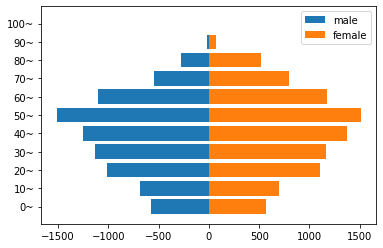

In [20]:
#가로막대그래프 그리기

import matplotlib.pyplot as plt
plt.barh(range(11), m, label='male')
plt.barh(range(11), f, label='female')
plt.legend() #범례표시
plt.yticks(range(0,11),['0~','10~','20~','30~','40~','50~','60~','70~','80~','90~','100~'])
plt.show()

알고 싶은 지역의 이름(읍면동단위)를 입력해주세요:대치1동
[-906, -3002, -1222, -547, -2405, -2227, -968, -584, -193, -16, -2]
[803, 2332, 1143, 842, 3192, 1792, 1081, 547, 187, 57, 4]


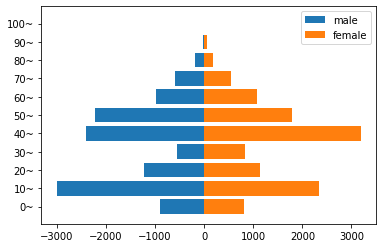

In [21]:
# 사용자에게 입력받아 출력하기

import csv
f=open(path3, encoding='cp949')
data=csv.reader(f)
m2=[]
f2=[]
name2 = input("알고 싶은 지역의 이름(읍면동단위)를 입력해주세요:")

for row in data:
  if name2 in row[0]:
    for i in range(0,11):
      m2.append(-int(row[i+3].replace(',','')))  # 남성 연령별 인구수 모음 (그래프 왼쪽에 그리기 위해 음수로 표현한거임!!)
      f2.append(int(row[i+16].replace(',','')))  # 여성 연령별 인구수 모음
print(m2)
print(f2)

import matplotlib.pyplot as plt
plt.barh(range(11),m2, label='male')
plt.barh(range(11),f2, label='female')
plt.legend()
plt.yticks(range(0,11),['0~','10~','20~','30~','40~','50~','60~','70~','80~','90~','100~'])
plt.show()

[17460]
[19709]
[17460, 19709]


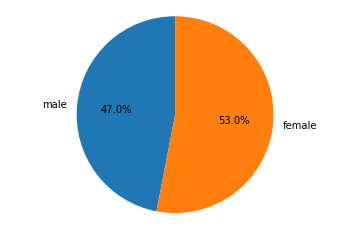

In [22]:
#남성과 여성의 총 인원수의 원그래프 그리기

import csv
f=open(path3, encoding='cp949')
data=csv.reader(f)
m3=[]
f3=[]
name3 = '공덕동' #input("알고 싶은 지역의 이름(읍면동단위)를 입력해주세요:")

for row in data:
  if name3 in row[0]:
    m3.append(int(row[1].replace(',','')))  # 남성 총 인구수
    f3.append(int(row[14].replace(',','')))  # 여성 총 인구수
print(m3)
print(f3)

size=[] #원그래프에 그릴 데이터의 값 저장
size=m3+f3 #남성의 수와 여성의 수를 리스트에 나란히 저장
print(size)
plt.pie(size, labels=['male','female'], startangle=90, autopct='%.1f%%') # startangle=90 :12시방향부터 그리기, autopct : %값 보여주기
plt.axis('equal')
plt.show()